Regression in Python
======

This notebook contains some code snippets demonstrating the regression analysis using Python with a specific focus in statsmodels. 

As usual, we first import all the required modules. 

In [1]:
import pandas as pd
import statsmodels.formula.api as smf #for R like formula
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import copy as copy
import scipy.stats as sps #For the diagnostic tests

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

Ordinary Least Squares
-------------

Consider the following linear model:

$$ y_i = \mathbf{x}_i' \beta + u_i $$

where $\mathbf{x}_i = \left (x_0, x_{1i}, \ldots, x_{Ki} \right )'$ is a vector of exogeneous or explanatory variables and $\beta = \left ( \beta_1, \ldots, \beta_K \right )'$ is a vector unknown paramters. Let $\mathbf{X} = \left ( \mathbf{x}_1, \ldots, \mathbf{x}_N \right )'$ and $\mathbf{y} = (y_1,\ldots, y_N )'$ then the OLS estimator is defined to be 

$$\hat{\beta} = (\mathbf{X}'\mathbf{X} )^{-1} \mathbf{X}'\mathbf{y}.$$


Now we import the data. Let's revisit our murder rate data. 

In [3]:
m = pd.read_csv('mur.csv', header=0, index_col=0)

In [4]:
m.head()

Index       AGE     LF        M        NW        PC    POP  \
State                                                                    
Alabama         1  0.165999  0.512  19.2523  0.320782  0.203578   8.67   
Arkansas        2  0.154263  0.485   7.5286  0.224143  0.326934   3.72   
Arizona         3  0.152304  0.508   5.6567  0.126838  0.400922   2.12   
California      4  0.132523  0.544   3.2094  0.063389  0.317876  66.10   
Colorado        5  0.150324  0.524   2.8048  0.021460  0.349780   6.42   

                  PX  SOUTH    T      U   URB     W         X  XPOS  
State                                                                
Alabama     0.035000      1   47  0.042  40.1  1102  0.324932     1  
Arkansas    0.080851      1   58  0.047  32.3   920  0.317400     1  
Arizona     0.011765      0   82  0.076  36.5  1716  0.302128     1  
California  0.070370      0  100  0.079  67.1  2184  0.297032     1  
Colorado    0.061538      0  222  0.042  57.4  1748  0.302152     1

Sort index so that we can slice. 

In [5]:
m.sort_index(inplace=True)

In [6]:
m.head()

Index       AGE     LF        M        NW        PC    POP  \
State                                                                    
Alabama         1  0.165999  0.512  19.2523  0.320782  0.203578   8.67   
Arizona         3  0.152304  0.508   5.6567  0.126838  0.400922   2.12   
Arkansas        2  0.154263  0.485   7.5286  0.224143  0.326934   3.72   
California      4  0.132523  0.544   3.2094  0.063389  0.317876  66.10   
Colorado        5  0.150324  0.524   2.8048  0.021460  0.349780   6.42   

                  PX  SOUTH    T      U   URB     W         X  XPOS  
State                                                                
Alabama     0.035000      1   47  0.042  40.1  1102  0.324932     1  
Arizona     0.011765      0   82  0.076  36.5  1716  0.302128     1  
Arkansas    0.080851      1   58  0.047  32.3   920  0.317400     1  
California  0.070370      0  100  0.079  67.1  2184  0.297032     1  
Colorado    0.061538      0  222  0.042  57.4  1748  0.302152     1

In [7]:
model01 = 'M~1+PC+PX+T+XPOS'
reg = smf.ols(model01,data=m).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      M   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     8.400
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           5.48e-05
Time:                        11:18:40   Log-Likelihood:                -114.08
No. Observations:                  44   AIC:                             238.2
Df Residuals:                      39   BIC:                             247.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7949      1.990      4.421      0.000       4.771      12.819
PC            -6.0327      3.795     -1.590      0.120     -13.708       1.643
PX             0.4935      8.717      0.057      0.955     -17.137      18.124
T             -0.0370      0.009     -4.332      0.000      -0.054      -0.020
XPOS           4.0193      1.443      2.785      0.008       1.100       6.939
==============================================================================
Omnibus:                        6.474   Durbin-Watson:                   1.680
Prob(Omnibus):                  0.039   Jarque-Bera (JB):                5.515
Skew:                           0.846   Prob(JB):                       0.0635
Kurtosis:                       3.377   Cond. No.                     2.53e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

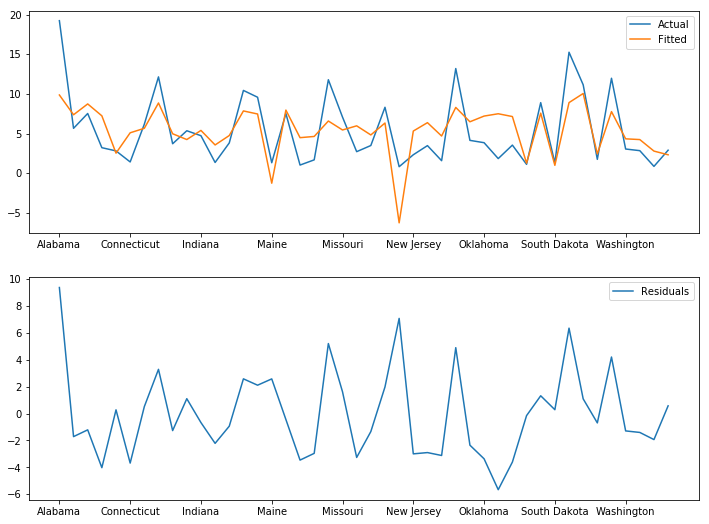

In [8]:
x = np.arange(0,len(m.index))
xloc = np.arange(0,44,5)
xticks = [m.index[i] for i in xloc]
plt.subplot(2,1,1)
plt.plot(x, m['M'].values, x, reg.fittedvalues.values)
plt.xticks(xloc, xticks)
plt.legend(['Actual', 'Fitted'])
plt.subplot(2,1,2)
plt.plot(x, reg.resid.values )
plt.xticks(xloc, xticks)
plt.legend(['Residuals'])

Becasue model specification relies solely on a string variables, we can manipulate the string to give us different model specifications. This also allows us to estimate multiple models quickly. 

In [9]:
def create_model(varlist, dep, const=True):
    """
    Create a model specification string. 
    Input:
        varlist: list. List of explanatory variables. 
        dep: string. The name of the dependent variable
        const: Boolean. Include a constant term if true. 
    Output:
        model: a string in the form 'dep~var1+var2+var3' 
    
    """
    if const is True:
        deplist = dep+'~1+'
    else:
        deplist = dep+'~'
    return deplist+'+'.join(varlist)

In [10]:
varlist = ['PC', 'PX', 'T', 'XPOS', 'SOUTH'] #This gives the deterrant model. 
model02 = create_model(varlist, 'M')

In [11]:
model02

'M~1+PC+PX+T+XPOS+SOUTH'

We can create a list of models

In [12]:
m.columns

Index(['Index', 'AGE', 'LF', 'M', 'NW', 'PC', 'POP', 'PX', 'SOUTH', 'T', 'U',
       'URB', 'W', 'X', 'XPOS'],
      dtype='object')

In [13]:
list1 = varlist + ['W','X','U','LF'] # we can add a list of variables to get the rational maximiser model. 
list2 = varlist + ['NW', 'AGE', 'URB']#we can add a different list to get the crime of passion model
list3 = list(m.columns) # we can include all variables.
[list3.remove(i) for i in ['Index', 'POP', 'M']] #by removing the elements we don't want from the data index. 

[None, None, None]

In [14]:
set_model = [list1, list2, list3] #create the list of models. 
list_reg = [] #initiate the list to store the results. 
for model in set_model: #looping through each model and conduct estimation. 
    temp_model = create_model(model, 'M') #create the specification string based on the list of variables. 
    temp = smf.ols(temp_model, data=m).fit() #estimation 
    list_reg.append(temp) #storing the result. 

In [15]:
[i.summary() for i in list_reg]

[<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                      M   R-squared:                       0.767
 Model:                            OLS   Adj. R-squared:                  0.705
 Method:                 Least Squares   F-statistic:                     12.43
 Date:                Fri, 03 Nov 2017   Prob (F-statistic):           1.98e-08
 Time:                        11:18:40   Log-Likelihood:                -95.713
 No. Observations:                  44   AIC:                             211.4
 Df Residuals:                      34   BIC:                             229.3
 Df Model:                           9                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

Diagnostic Tests
--------------

The OLS estimator relies several assumptions:

$$\begin{align*} 
    E (u_i) =& 0 \\
    E (u_i^2) =& \sigma^2 \\
    E (u_iu_j) =& 0 \qquad \forall i \neq j \\
    E (u_i | \mathbb{x} ) =& 0 \\
    r (X'X) = K 
    \end{align*} 
    $$
    
Under Assumptions 1-3, 

$$Var(\hat{\beta}) = \sigma^2 (\mathbf{X}'\mathbf{X} )^{-1}.$$ 

**Gauss-Markov Theorem**: Under these assumptions, the OLS estimator is the *Best Linear Unbiased Estimator* (BLUE) for the linear regression model. 

Without these assumptions, OLS may behave quite 'badly'. We can test for most of these assumptions



In [16]:
temp = list_reg[0] 
f2 = np.power(temp.fittedvalues,2)
f2.shape
temp.model.endog

array([ 19.2523,   5.6567,   7.5286,   3.2094,   2.8048,   1.4085,
         6.1778,  12.1511,   3.7062,   5.3496,   4.7234,   1.3423,
         3.809 ,  10.4411,   9.5804,   1.3094,   7.522 ,   1.0156,
         1.6721,  11.7936,   7.0718,   2.7072,   3.4836,   8.3135,
         0.807 ,   2.3161,   3.4709,   1.5683,  13.2054,   4.1335,
         3.8393,   1.8328,   3.536 ,   1.1084,   8.8992,   1.2739,
        15.2657,  11.1535,   1.7368,  11.9782,   3.0412,   2.8339,
         0.8477,   2.8915])

In [17]:
def diag_RESET(fit):
    """
    Construct the Ramsey Regression Specification Errors Test (RESET)
    Input:
        fit: An statsmodels.OLSresult class
    Output:
        [LM, p(LM)]: (2,) list. LM Test statistics and its p-value under Chi-sqaured (1). 
    
    """
    N,K = fit.model.exog.shape
    f2 = np.power(fit.fittedvalues.values,2).reshape((N,1))
    u = fit.resid.values
    exo = np.c_[fit.model.exog, f2]
    reg_reset = sm.OLS(u, exo, hasconst=True).fit()
    LM = N*reg_reset.rsquared
    print(reg_reset.summary())
    return [LM, 1-sps.chi2.cdf(LM,1)]

In [18]:
diag_RESET(temp)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                 -0.144
Method:                 Least Squares   F-statistic:                    0.4585
Date:                Fri, 03 Nov 2017   Prob (F-statistic):              0.904
Time:                        11:18:41   Log-Likelihood:                -92.851
No. Observations:                  44   AIC:                             207.7
Df Residuals:                      33   BIC:                             227.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6373     17.845      1.437      0.1

[5.3679610653959964, 0.020509938736003264]

In [19]:
def diag_het_BP(fit):
    """
    Construct the Breuch-Pagan test statistics for Homoskedasticity. 
    Input:
        fit: An statsmodels.OLSresult class
    Output:
        [LM, p(LM)]: (2,) list. LM Test statistics and its p-value under Chi-sqaured (1). 
    """
    N,K = fit.model.exog.shape
    u2 = np.power(fit.resid.values, 2)
    f2 = np.power(fit.fittedvalues.values,2).reshape((N,1))
    exo = np.c_[np.ones((N,1)), f2]
    reg_het = sm.OLS(u2,exo, hasconst=True).fit()
    LM = N*reg_het.rsquared
    print(reg_het.summary())
    return [LM, 1-sps.chi2.cdf(LM,1)]

In [20]:
diag_het_BP(temp)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     11.15
Date:                Fri, 03 Nov 2017   Prob (F-statistic):            0.00177
Time:                        11:18:41   Log-Likelihood:                -148.77
No. Observations:                  44   AIC:                             301.5
Df Residuals:                      42   BIC:                             305.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4923      1.427      1.045      0.3

[9.2331734477233702, 0.0023766936979311426]

In [21]:
def diag_autocorel(fit):
    """
    Construct the LM test statistics for Serial Correlation. 
    Input:
        fit: An statsmodels.OLSresult class
    Output:
        [LM, p(LM)]: (2,) list. LM Test statistics and its p-value under Chi-sqaured (1). 
    """
    N,K = fit.model.exog.shape
    u = fit.resid.values[1:N]
    u1 = fit.resid.values[0:N-1].reshape((N-1,1))
    exo = np.c_[fit.model.exog[0:N-1,:], u1]
    reg_autoc = sm.OLS(u, exo, hasconst=True).fit()
    LM = N*reg_autoc.rsquared
    print(reg_autoc.summary())
    return [LM, 1-sps.chi2.cdf(LM,1)]

In [22]:
diag_autocorel(temp)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.071
Date:                Fri, 03 Nov 2017   Prob (F-statistic):              0.411
Time:                        11:18:41   Log-Likelihood:                -82.558
No. Observations:                  43   AIC:                             187.1
Df Residuals:                      32   BIC:                             206.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0806     11.218     -0.809      0.4

[11.036845796683254, 0.00089318700743656887]

In [23]:
temp.resid.var()

4.644647058092276